### Importação dos dados



In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja_1 = pd.read_csv(url)
loja_2 = pd.read_csv(url2)
loja_3 = pd.read_csv(url3)
loja_4 = pd.read_csv(url4)

loja_1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Adicionar coluna de identificação
loja_1["Loja"] = "Loja 1"
loja_2["Loja"] = "Loja 2"
loja_3["Loja"] = "Loja 3"
loja_4["Loja"] = "Loja 4"

# Unir os dados
df = pd.concat([loja_1, loja_2, loja_3, loja_4])

# Calculando o faturamento (somando a coluna "Preço")
faturamento_loja_1 = loja_1["Preço"].sum()
faturamento_loja_2 = loja_2["Preço"].sum()
faturamento_loja_3 = loja_3["Preço"].sum()
faturamento_loja_4 = loja_4["Preço"].sum()

# Exibindo os resultados
print("Faturamento por Loja:")
print(f"Loja 1: R$ {faturamento_loja_1:,.2f}")
print(f"Loja 2: R$ {faturamento_loja_2:,.2f}")
print(f"Loja 3: R$ {faturamento_loja_3:,.2f}")
print(f"Loja 4: R$ {faturamento_loja_4:,.2f}")

Faturamento por Loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


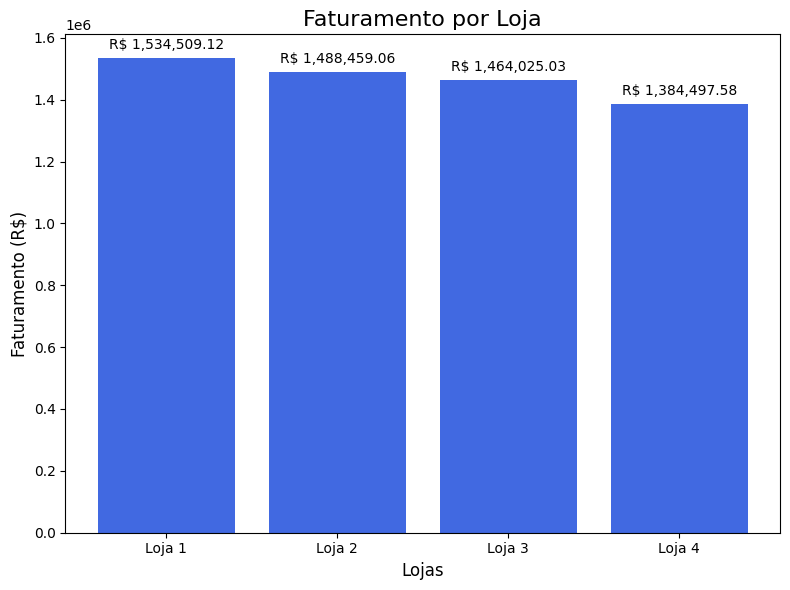

In [17]:
# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja_1, faturamento_loja_2, faturamento_loja_3, faturamento_loja_4]

# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.bar(lojas, faturamentos, color='royalblue')

# Título e rótulos
plt.title('Faturamento por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)

# Adicionar valores em cima das barras
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + 20000, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=10)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


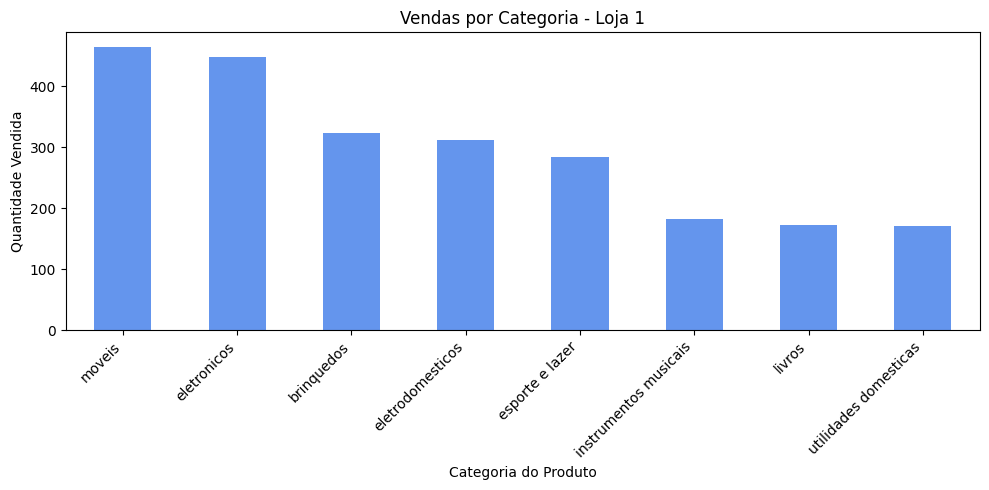

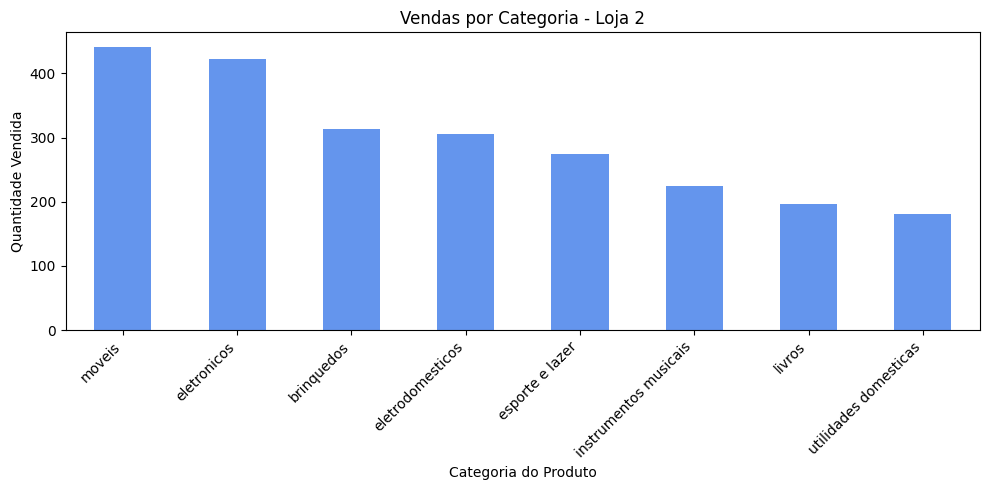

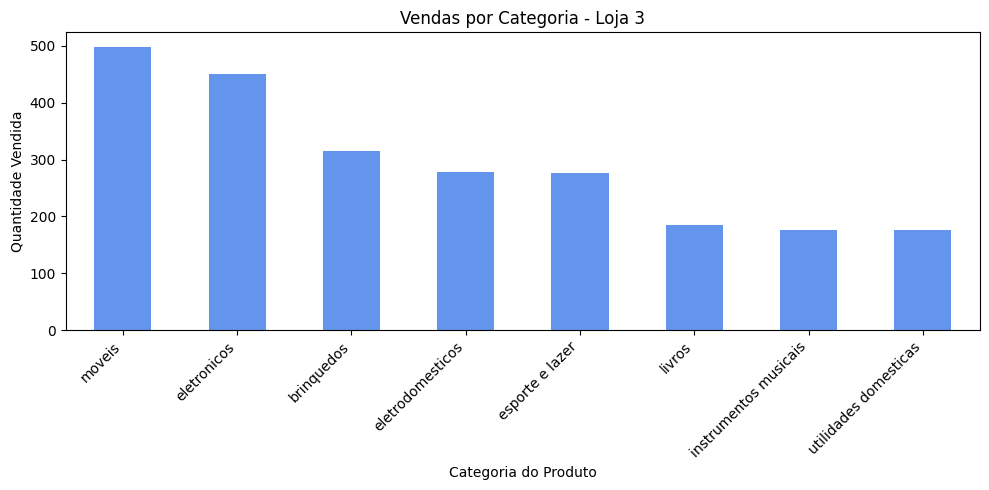

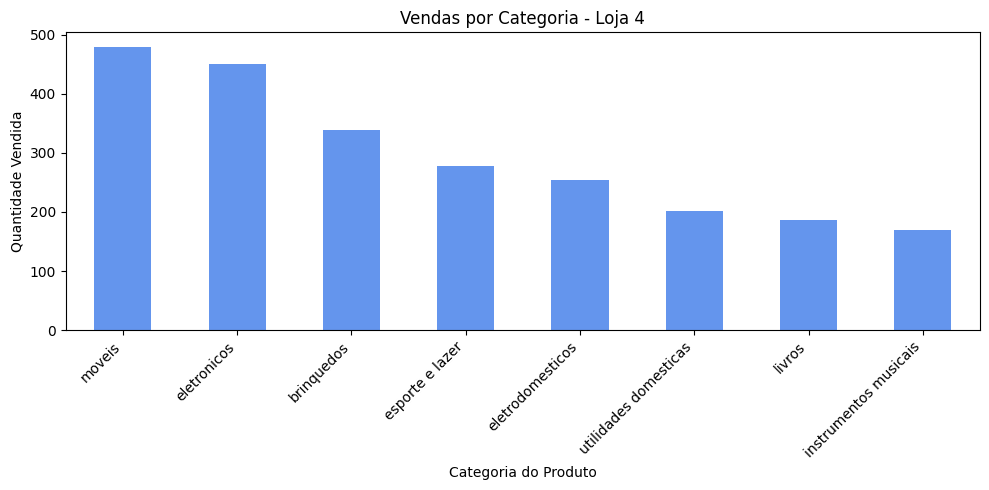

In [19]:
# Função para calcular e plotar a contagem por categoria
def plot_vendas_por_categoria(df, nome_loja):
    categoria_counts = df['Categoria do Produto'].value_counts()

    # Plotando
    plt.figure(figsize=(10, 5))
    categoria_counts.plot(kind='bar', color='cornflowerblue')
    plt.title(f'Vendas por Categoria - {nome_loja}')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Aplicando para cada loja
plot_vendas_por_categoria(loja_1, "Loja 1")
plot_vendas_por_categoria(loja_2, "Loja 2")
plot_vendas_por_categoria(loja_3, "Loja 3")
plot_vendas_por_categoria(loja_4, "Loja 4")


# 3. Média de Avaliação das Lojas

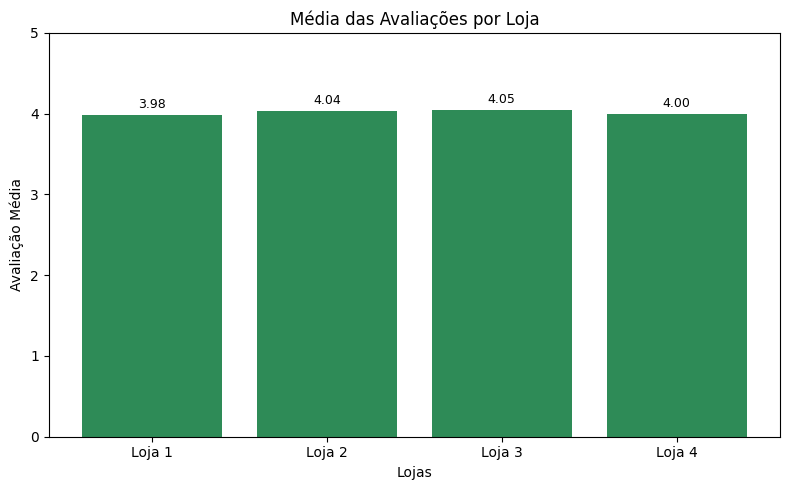

In [28]:
# Calculando a média das avaliações por loja
media_avaliacao_1 = loja_1['Avaliação da compra'].mean()
media_avaliacao_2 = loja_2['Avaliação da compra'].mean()
media_avaliacao_3 = loja_3['Avaliação da compra'].mean()
media_avaliacao_4 = loja_4['Avaliação da compra'].mean()

# Organizando em um dicionário para plotar
avaliacoes = {
    'Loja 1': media_avaliacao_1,
    'Loja 2': media_avaliacao_2,
    'Loja 3': media_avaliacao_3,
    'Loja 4': media_avaliacao_4,
}

# Plotando o gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(avaliacoes.keys(), avaliacoes.values(), color='seagreen')

plt.title('Média das Avaliações por Loja')
plt.xlabel('Lojas')
plt.ylabel('Avaliação Média')
plt.ylim(0, 5)

# Adicionando os valores no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f"{yval:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

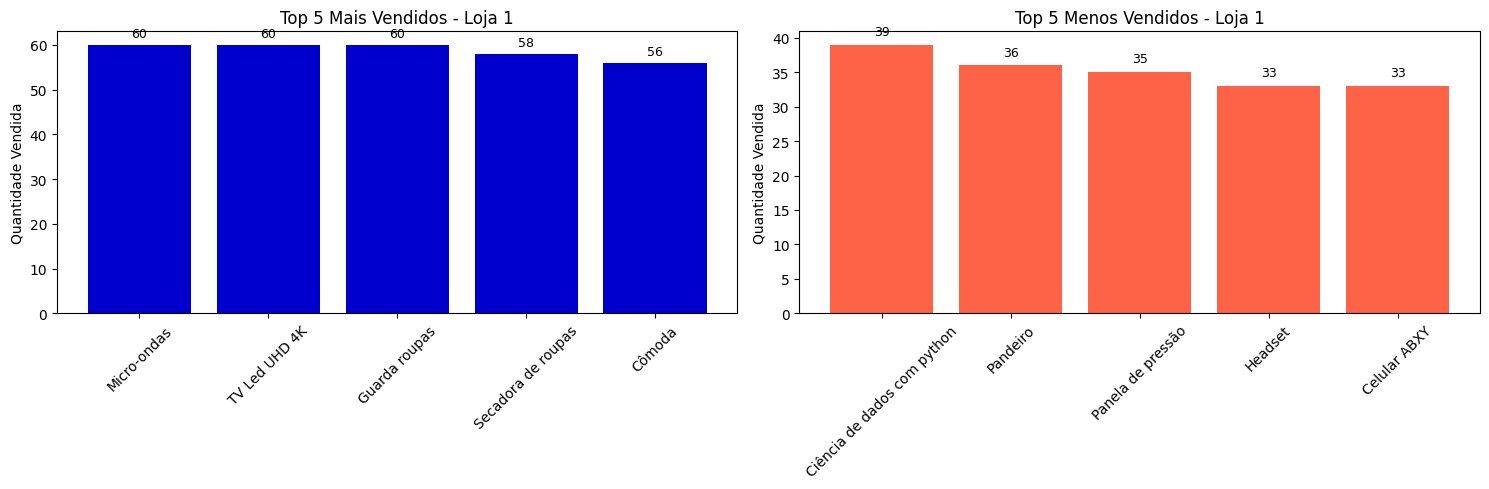

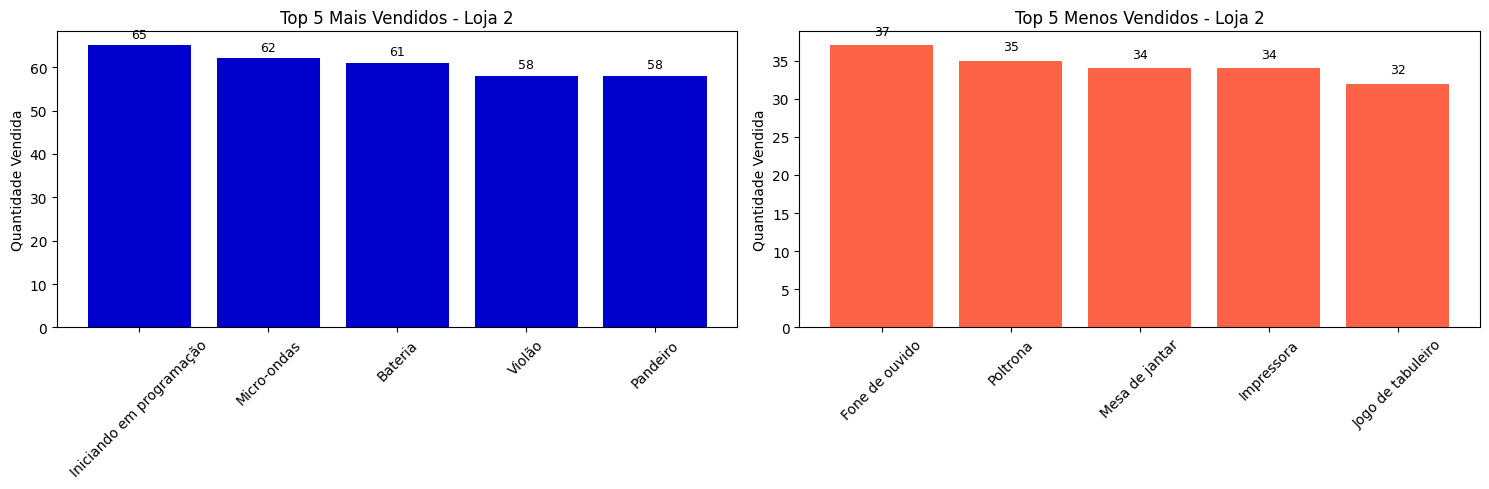

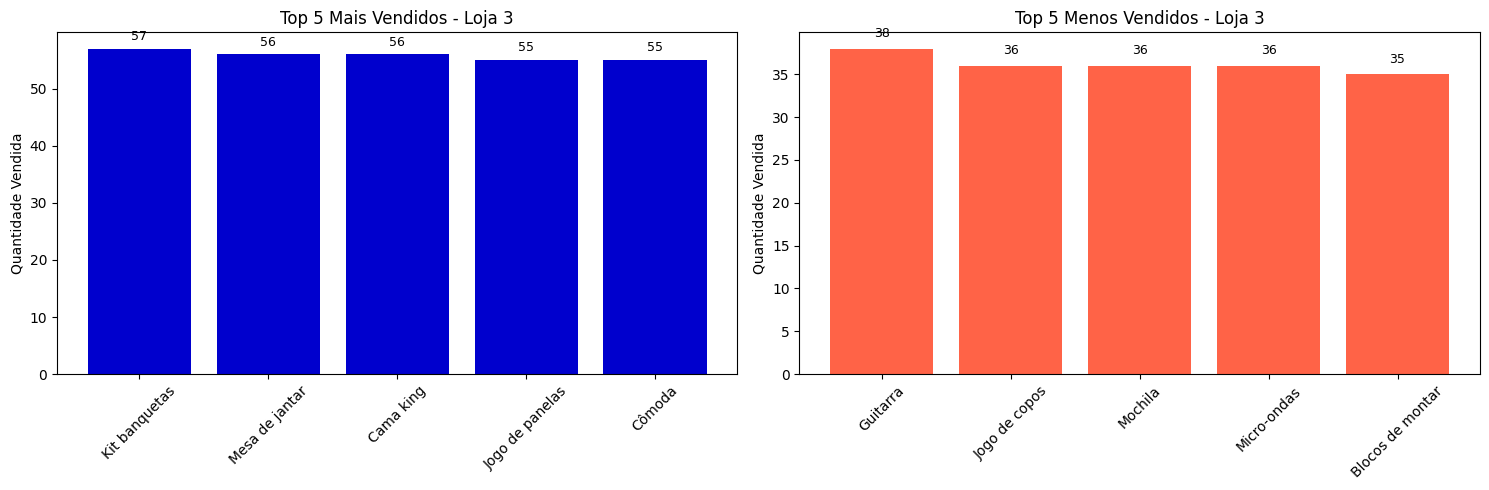

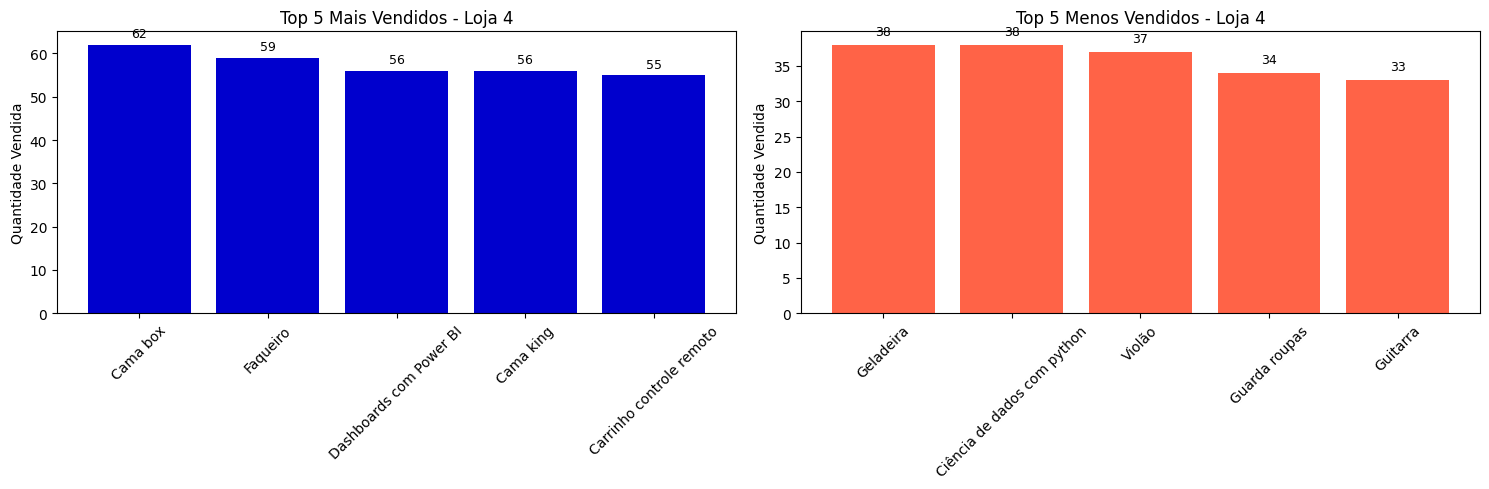

In [22]:
# Função para plotar os 5 produtos mais e os 5 menos vendidos
def produtos_mais_menos_vendidos(df, nome_loja):
    contagem_produtos = df['Produto'].value_counts()

    top_mais = contagem_produtos.head(5)
    top_menos = contagem_produtos.tail(5)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Mais vendidos
    bars1 = axs[0].bar(top_mais.index, top_mais.values, color='mediumblue')
    axs[0].set_title(f'Top 5 Mais Vendidos - {nome_loja}')
    axs[0].set_ylabel('Quantidade Vendida')
    axs[0].tick_params(axis='x', rotation=45)
    for bar in bars1:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

    # Menos vendidos
    bars2 = axs[1].bar(top_menos.index, top_menos.values, color='tomato')
    axs[1].set_title(f'Top 5 Menos Vendidos - {nome_loja}')
    axs[1].set_ylabel('Quantidade Vendida')
    axs[1].tick_params(axis='x', rotation=45)
    for bar in bars2:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Aplicando para cada loja
produtos_mais_menos_vendidos(loja_1, "Loja 1")
produtos_mais_menos_vendidos(loja_2, "Loja 2")
produtos_mais_menos_vendidos(loja_3, "Loja 3")
produtos_mais_menos_vendidos(loja_4, "Loja 4")

#Loja 1 - Mais Vendidas

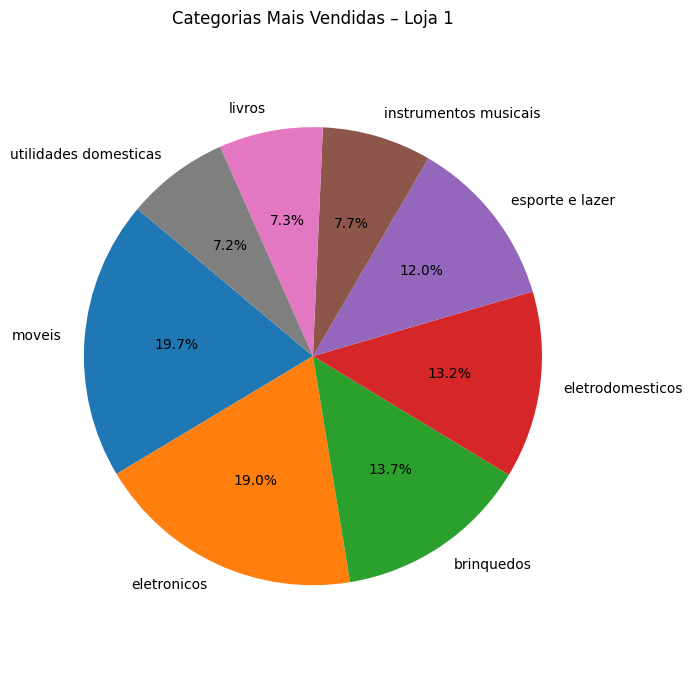

In [32]:
categoria_counts_1 = loja_1['Categoria do Produto'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(categoria_counts_1, labels=categoria_counts_1.index, autopct='%1.1f%%', startangle=140)
plt.title('Categorias Mais Vendidas – Loja 1')
plt.axis('equal')
plt.tight_layout()
plt.show()


#Loja 2 - Mais Vendidas

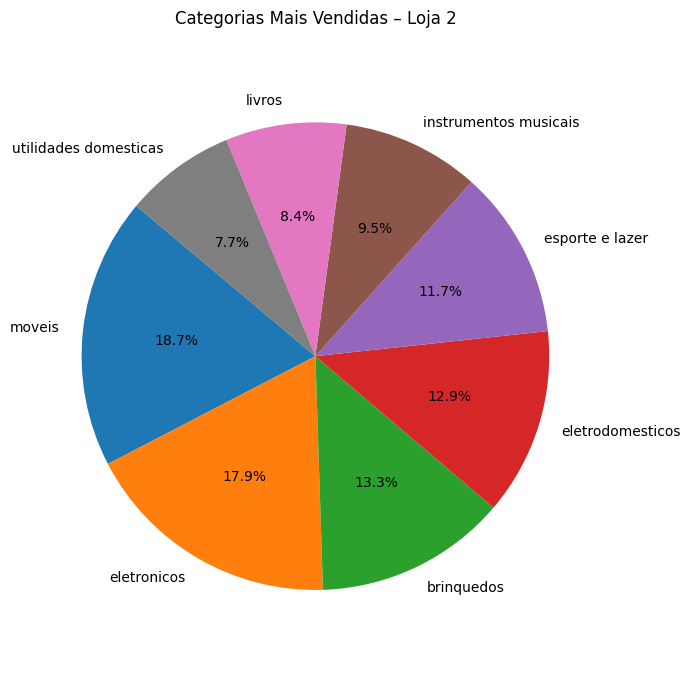

In [33]:
categoria_counts_2 = loja_2['Categoria do Produto'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(categoria_counts_2, labels=categoria_counts_2.index, autopct='%1.1f%%', startangle=140)
plt.title('Categorias Mais Vendidas – Loja 2')
plt.axis('equal')
plt.tight_layout()
plt.show()

#Loja 3 - Mais Vendidas

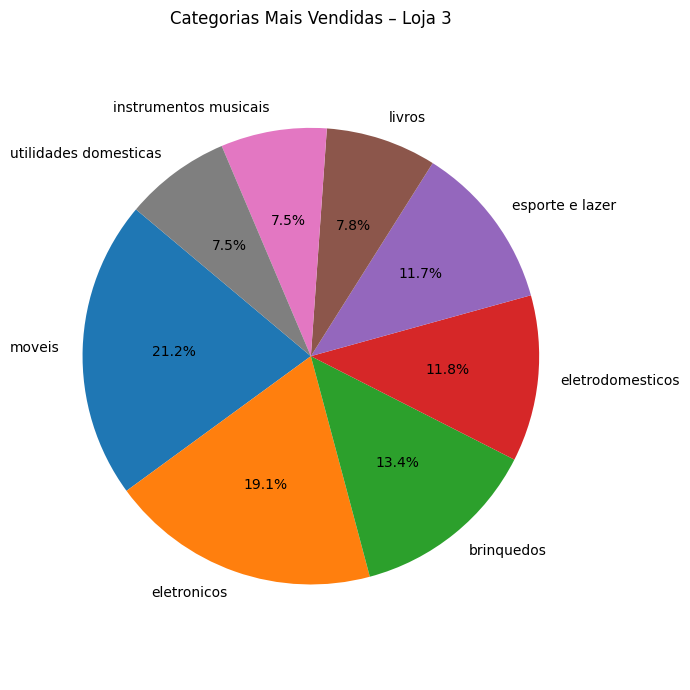

In [34]:
categoria_counts_3 = loja_3['Categoria do Produto'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(categoria_counts_3, labels=categoria_counts_3.index, autopct='%1.1f%%', startangle=140)
plt.title('Categorias Mais Vendidas – Loja 3')
plt.axis('equal')
plt.tight_layout()
plt.show()


#Loja 4 - Mais Vendidas

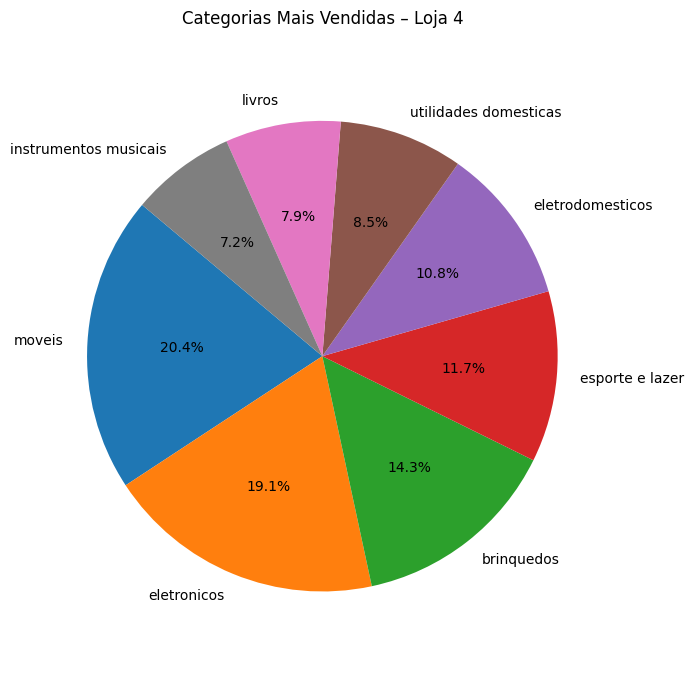

In [35]:
categoria_counts_4 = loja_4['Categoria do Produto'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(categoria_counts_4, labels=categoria_counts_4.index, autopct='%1.1f%%', startangle=140)
plt.title('Categorias Mais Vendidas – Loja 4')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


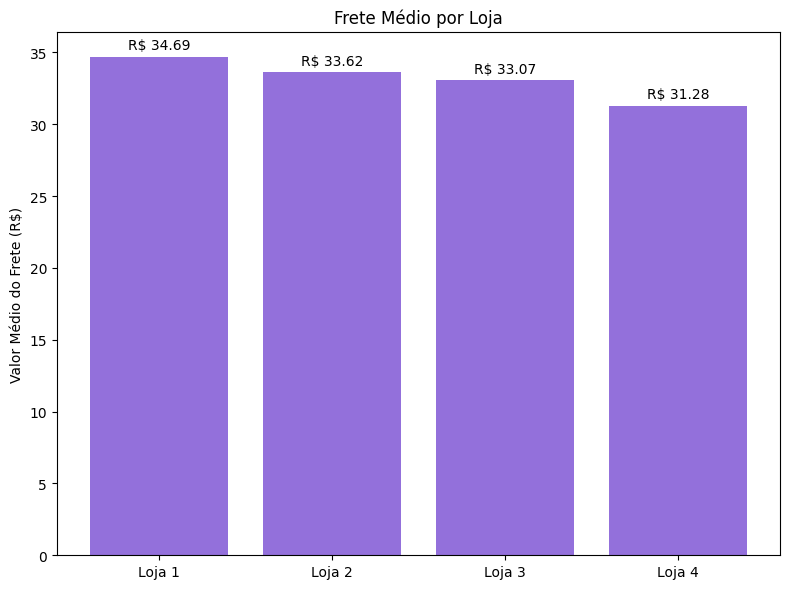

In [20]:
# Calcular o frete médio por loja
frete_medio = {
    'Loja 1': loja_1['Frete'].mean(),
    'Loja 2': loja_2['Frete'].mean(),
    'Loja 3': loja_3['Frete'].mean(),
    'Loja 4': loja_4['Frete'].mean()
}

# Plotar gráfico
plt.figure(figsize=(8, 6))
barras = plt.bar(frete_medio.keys(), frete_medio.values(), color='mediumpurple')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')

# Adicionando os valores no topo de cada barra
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f'R$ {yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Tabela Comparativa

In [58]:
import pandas as pd

tabela_comparativa = pd.DataFrame({
    'Métrica': [
        'Faturamento (R$)',
        'Categorias Mais Vendidas',
        'Média de Avaliação',
        'Top 1 Produto + Vendido',
        'Top 1 Produto - Vendido',
        'Frete Médio (R$)'
    ],
    'Loja 1': [
        faturamento_loja_1,
        ', '.join(loja_1['Categoria do Produto'].value_counts().head(2).index),
        round(loja_1['Avaliação da compra'].mean(), 2),
        loja_1['Produto'].value_counts().idxmax(),
        loja_1['Produto'].value_counts().idxmin(),
        round(loja_1['Frete'].mean(), 2)
    ],
    'Loja 2': [
        faturamento_loja_2,
        ', '.join(loja_2['Categoria do Produto'].value_counts().head(2).index),
        round(loja_2['Avaliação da compra'].mean(), 2),
        loja_2['Produto'].value_counts().idxmax(),
        loja_2['Produto'].value_counts().idxmin(),
        round(loja_2['Frete'].mean(), 2)
    ],
    'Loja 3': [
        faturamento_loja_3,
        ', '.join(loja_3['Categoria do Produto'].value_counts().head(2).index),
        round(loja_3['Avaliação da compra'].mean(), 2),
        loja_3['Produto'].value_counts().idxmax(),
        loja_3['Produto'].value_counts().idxmin(),
        round(loja_3['Frete'].mean(), 2)
    ],
    'Loja 4': [
        faturamento_loja_4,
        ', '.join(loja_4['Categoria do Produto'].value_counts().head(2).index),
        round(loja_4['Avaliação da compra'].mean(), 2),
        loja_4['Produto'].value_counts().idxmax(),
        loja_4['Produto'].value_counts().idxmin(),
        round(loja_4['Frete'].mean(), 2)
    ]
})

display(tabela_comparativa)


,Métrica,Loja 1,Loja 2,Loja 3,Loja 4
0,Faturamento (R$),1534509.12,1488459.06,1464025.03,1384497.58
1,Categorias Mais Vendidas,"moveis, eletronicos","moveis, eletronicos","moveis, eletronicos","moveis, eletronicos"
2,Média de Avaliação,3.98,4.04,4.05,4.0
3,Top 1 Produto + Vendido,Micro-ondas,Iniciando em programação,Kit banquetas,Cama box
4,Top 1 Produto - Vendido,Headset,Jogo de tabuleiro,Blocos de montar,Guitarra
5,Frete Médio (R$),34.69,33.62,33.07,31.28


In [66]:
import pandas as pd

tabela_comparativa = pd.DataFrame({
    'Métrica': [
        'Faturamento (R$)',
        'Categorias Mais Vendidas',
        'Média de Avaliação',
        'Top 1 Produto + Vendido',
        'Top 1 Produto - Vendido',
        'Frete Médio (R$)'
    ],
    'Loja 1': [
        faturamento_loja_1,
        ', '.join(loja_1['Categoria do Produto'].value_counts().head(2).index),
        round(loja_1['Avaliação da compra'].mean(), 2),
        loja_1['Produto'].value_counts().idxmax(),
        loja_1['Produto'].value_counts().idxmin(),
        round(loja_1['Frete'].mean(), 2)
    ],
    'Loja 2': [
        faturamento_loja_2,
        ', '.join(loja_2['Categoria do Produto'].value_counts().head(2).index),
        round(loja_2['Avaliação da compra'].mean(), 2),
        loja_2['Produto'].value_counts().idxmax(),
        loja_2['Produto'].value_counts().idxmin(),
        round(loja_2['Frete'].mean(), 2)
    ],
    'Loja 3': [
        faturamento_loja_3,
        ', '.join(loja_3['Categoria do Produto'].value_counts().head(2).index),
        round(loja_3['Avaliação da compra'].mean(), 2),
        loja_3['Produto'].value_counts().idxmax(),
        loja_3['Produto'].value_counts().idxmin(),
        round(loja_3['Frete'].mean(), 2)
    ],
    'Loja 4': [
        faturamento_loja_4,
        ', '.join(loja_4['Categoria do Produto'].value_counts().head(2).index),
        round(loja_4['Avaliação da compra'].mean(), 2),
        loja_4['Produto'].value_counts().idxmax(),
        loja_4['Produto'].value_counts().idxmin(),
        round(loja_4['Frete'].mean(), 2)
    ]
})

display(tabela_comparativa)


,Métrica,Loja 1,Loja 2,Loja 3,Loja 4
0,Faturamento (R$),1534509.12,1488459.06,1464025.03,1384497.58
1,Categorias Mais Vendidas,"moveis, eletronicos","moveis, eletronicos","moveis, eletronicos","moveis, eletronicos"
2,Média de Avaliação,3.98,4.04,4.05,4.0
3,Top 1 Produto + Vendido,Micro-ondas,Iniciando em programação,Kit banquetas,Cama box
4,Top 1 Produto - Vendido,Headset,Jogo de tabuleiro,Blocos de montar,Guitarra
5,Frete Médio (R$),34.69,33.62,33.07,31.28


#Relatório

🔍 1. Faturamento (R$)

Loja 1: 1.534.509,12 → maior faturamento

Loja 2: 1.488.459,06

Loja 3: 1.464.025,03

Loja 4: 1.384.497,58 → menor faturamento

🔻 Loja 4 tem o menor retorno financeiro.

🌟 2. Média de Avaliação

Loja 3: 4.05 → melhor avaliação

Loja 2: 4.04

Loja 4: 4.00

Loja 1: 3.98 → pior avaliação

📌 Aqui, Loja 1 tem a pior avaliação dos clientes.

🚚 3. Frete Médio (R$)

Loja 4: 31.28 → mais barato

Loja 3: 33.07

Loja 2: 33.62

Loja 1: 34.69 → mais caro

💸 Loja 4 tem o frete mais competitivo. Pode indicar maior eficiência logística ou menor área de abrangência.

🧾 4. Produtos + Vendido e - Vendido
Esses itens ajudam a entender o perfil de venda e aderência do público, mas não indicam, isoladamente, eficiência da loja. Nenhuma loja se destaca aqui em algo que justifique mantê-la só por isso.

✅ Análise Final: Qual vender?
Vamos cruzar os dois principais critérios de eficiência que são a Rentabilidade (faturamento) e Satisfação do cliente (avaliação média), temos o seguinte:

In [67]:
import pandas as pd

# Dados das lojas
dados = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": ["1º (mais alta)", "2º", "3º", "4º"],
    "Avaliação": ["4º (pior avaliação)", "2º", "1º (melhor avaliação)", "3º"],
    "Notas": [
        "Alta receita, baixa satisfação",
        "Boa em tudo",
        "Boa satisfação, faturamento ok",
        "Pior receita, avaliação mediana"
    ]
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Exibindo a tabela
print(df)


     Loja     Faturamento              Avaliação  \
0  Loja 1  1º (mais alta)    4º (pior avaliação)   
1  Loja 2              2º                     2º   
2  Loja 3              3º  1º (melhor avaliação)   
3  Loja 4              4º                     3º   

                             Notas  
0   Alta receita, baixa satisfação  
1                      Boa em tudo  
2   Boa satisfação, faturamento ok  
3  Pior receita, avaliação mediana  


📌 Mesmo com frete mais barato, Loja 4 tem o menor faturamento e não se destaca em nenhum outro ponto estratégico.

📌 Loja 1 tem avaliações ruins, mas ainda vende muito bem (e pode ser melhorada).

# Análise Final

Com base nos dados apresentados, recomenda-se que o Sr. João venda a Loja 4 para iniciar seu novo empreendimento. Essa loja tem o pior desempenho financeiro da rede e não se destaca em nenhuma métrica positiva relevante o suficiente para compensar esse baixo faturamento.

Assim, a venda da Loja 4 traria menos impacto negativo para a rede como um todo e liberaria capital para o novo investimento do Sr. João.